In [1]:
# !pip uninstall pandas
# !pip install pandas==1.3.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'1.3.0'

In [4]:
dataset = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/train.csv')

In [5]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dataset_cleaned = dataset.drop(['Name', 'PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [7]:
dataset_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [10]:
dataset_cleaned['Sex'] = label.fit_transform(dataset_cleaned['Sex'])

In [11]:
dataset_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [12]:
dataset_cleaned = dataset_cleaned.fillna(dataset_cleaned['Age'].median())

In [13]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [14]:
train_Y = dataset_cleaned['Survived']
train_X = dataset_cleaned.drop(['Survived'], axis = 1)

In [15]:
train_X.shape, train_Y.shape

((891, 6), (891,))

In [16]:
def partitioning(train_X, feature, threshold):
    trainX_left = pd.DataFrame([], columns=train_X.columns)
    trainX_right= pd.DataFrame([], columns=train_X.columns)
    
    for i in range(train_X.shape[0]):
        value = train_X[feature].loc[i]
        
        if value > threshold:
            trainX_right = trainX_right.append(train_X.loc[i])
            
        else:
            trainX_left = trainX_left.append(train_X.loc[i])
            
    return trainX_left, trainX_right

In [17]:
left, right = partitioning(train_X[:10], 'Fare', 20)

In [18]:
print(left)
print(right)

   Pclass  Sex   Age  SibSp  Parch     Fare
0     3.0  1.0  22.0    1.0    0.0   7.2500
2     3.0  0.0  26.0    0.0    0.0   7.9250
4     3.0  1.0  35.0    0.0    0.0   8.0500
5     3.0  1.0  28.0    0.0    0.0   8.4583
8     3.0  0.0  27.0    0.0    2.0  11.1333
   Pclass  Sex   Age  SibSp  Parch     Fare
1     1.0  0.0  38.0    1.0    0.0  71.2833
3     1.0  0.0  35.0    1.0    0.0  53.1000
6     1.0  1.0  54.0    0.0    0.0  51.8625
7     3.0  1.0   2.0    3.0    1.0  21.0750
9     2.0  0.0  14.0    1.0    0.0  30.0708


In [19]:
# print(train_X['Age'].loc[0])
arr = np.array([1,2,3,4,5,0,2,11,3,3,5,56,2,1,3,3,3,3,3,1,23,3])
print(np.unique(arr, return_counts=True))
print(arr.shape[0])

(array([ 0,  1,  2,  3,  4,  5, 11, 23, 56]), array([1, 3, 3, 9, 1, 2, 1, 1, 1], dtype=int64))
22


In [20]:
def cross_entropy(train_X_col):
    
    unique_values = np.unique(train_X_col, return_counts=True)
    
    entropy = 0
    
    for i in unique_values[1]:
        entropy += (i/train_X_col.shape[0])*np.log2(i/train_X_col.shape[0])
        
    return -1*(entropy)

In [21]:
arr = np.array([1,1,1,1,1,1,0,0,0,0,0,0])
print(np.unique(arr, return_counts=True))
print(arr.shape[0])
print(cross_entropy(arr))

(array([0, 1]), array([6, 6], dtype=int64))
12
1.0


In [22]:
dataset_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [23]:
def information_gain(dataset_cleaned, feature_name, feature_value_threshold):
    
    data_left, data_right = partitioning(dataset_cleaned, feature_name, feature_value_threshold)
    
    prob_left = data_left.shape[0]/dataset_cleaned.shape[0]
    prob_right = data_right.shape[0]/dataset_cleaned.shape[0]
    
#     print(prob_left, prob_right)
    
    gained_information = cross_entropy(dataset_cleaned['Survived']) - (prob_left*cross_entropy(data_left['Survived'])
                                                                       + prob_right*cross_entropy(data_right['Survived']))

#     gained_information = cross_entropy(dataset_cleaned['Survived']) - (cross_entropy(data_left['Survived'])
#                                                                        + cross_entropy(data_right['Survived']))
    
    return gained_information

In [24]:
for i in train_X.columns:
    print(i, information_gain(dataset_cleaned, i, train_X[i].mean()))

Pclass 0.07579362743608165
Sex 0.2176601066606142
Age 0.0008836151229467681
SibSp 0.009584541813400071
Parch 0.015380754493137694
Fare 0.042140692838995464


In [25]:
train_X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
class Decision_Tree:
    
    def __init__(self, max_depth, depth = 0):
        self.depth = depth
        self.max_depth = max_depth
        self.status = None
        self.data_left = None
        self.data_right = None
        self.feature_name = None
        self.feature_value_threshold = None
        
    def fit(self, dataset):
        
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gain_info = []
        
        for i in features:
            info_gain = information_gain(dataset, i, dataset[i].mean())
            gain_info.append(info_gain)
            
        self.feature_name = features[np.argmax(gain_info)]
        
        self.feature_value_threshold = dataset[self.feature_name].mean()
        print(f'My new node is {self.feature_name}')
        
        data_left, data_right = partitioning(dataset, self.feature_name, self.feature_value_threshold)
        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop = True)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if dataset.Survived.mean() >= 0.5:
                self.status = 1
            else:
                self.status = 0
            return
        
        if self.depth>=self.max_depth:
            if dataset.Survived.mean() >= 0.5:
                self.status = 1
            else:
                self.status = 0
            return
        
        self.data_left = Decision_Tree(depth = self.depth + 1, max_depth=self.max_depth)
        self.data_left.fit(data_left)
        
        self.data_right = Decision_Tree(depth = self.depth + 1, max_depth=self.max_depth)
        self.data_right.fit(data_right)
        
        if dataset.Survived.mean() >= 0.5:
            self.status = 1
        else:
            self.status = 0
        return
    
    def predict(self, test_data):
        if test_data[self.feature_name] > self.feature_value_threshold:
            
            if self.data_right is None:
                return self.status
            return self.data_right.predict(test_data)
        
        else:
            if self.data_left is None:
                return self.status
            return self.data_left.predict(test_data)

In [27]:
data_train = dataset_cleaned[:-100]
data_test = dataset_cleaned[-100:]

In [28]:
data_train.shape, data_test.shape

((791, 7), (100, 7))

In [38]:
decision_tree = Decision_Tree(10)
decision_tree.fit(data_train)

My new node is Sex
My new node is Pclass
My new node is Pclass
My new node is Parch
My new node is Age
My new node is Pclass
My new node is Age
My new node is Pclass
My new node is SibSp
My new node is Age
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is SibSp
My new node is Pclass
My new node is Age
My new node is SibSp
My new node is Fare
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is Fare
My new node is Parch
My new node is SibSp
My new node is Age
My new node is Age
My new node is Age
My new node is Pclass
My new node is Age
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is Fare
My new node is Age
My new node is Age
My new node is Pclass
My new node is Age
My new node is Age
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is Age
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is Age
My new node is Pclass
M

My new node is Parch
My new node is Pclass
My new node is Age
My new node is Age
My new node is Age
My new node is Pclass
My new node is Age
My new node is Pclass
My new node is Pclass
My new node is Pclass
My new node is Pclass


In [39]:
print(decision_tree.feature_name)
print(decision_tree.feature_value_threshold)
print(decision_tree.data_left.feature_name)
print(decision_tree.data_left.feature_value_threshold)
print(decision_tree.data_right.feature_name)
print(decision_tree.data_right.feature_value_threshold)

Sex
0.6472819216182049
Pclass
2.1684587813620073
Fare
26.54658046875


In [40]:
data_test = data_test.reset_index(drop=True)

In [41]:
y_preds = []
for i in range(data_test.shape[0]):
    y_preds.append(decision_tree.predict(test_data = data_test.loc[i]))

In [42]:
y_label = data_test['Survived']

In [43]:
for i in range(y_label.shape[0]):
    print(y_label[i], y_preds[i])

0 0
0 0
0 1
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 1
1 1
1 1
1 0
0 0
0 0
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 0
0 0
0 0
0 1
1 1
1 0
1 1
1 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 1
1 0
1 1
1 1
1 0
0 0
0 0
0 1
1 0
0 0
0 0
1 1
1 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
0 1
1 1
0 0


In [44]:
# y_label.shape, y_preds.shape

In [45]:
def accuracy(preds, label):
    acc = np.sum(preds == label)/label.shape[0]
    return acc

In [46]:
acc = accuracy(np.array(y_preds), y_label)
print(f'Accuracy is: {acc}')

Accuracy is: 0.83


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [88]:
train_list = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [89]:
tree.fit(data_train[train_list], data_train['Survived'])

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [90]:
tree.predict(data_test[train_list])

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [91]:
tree.score(data_test[train_list], data_test['Survived'])

0.84

In [92]:
from sklearn import tree as d_tree

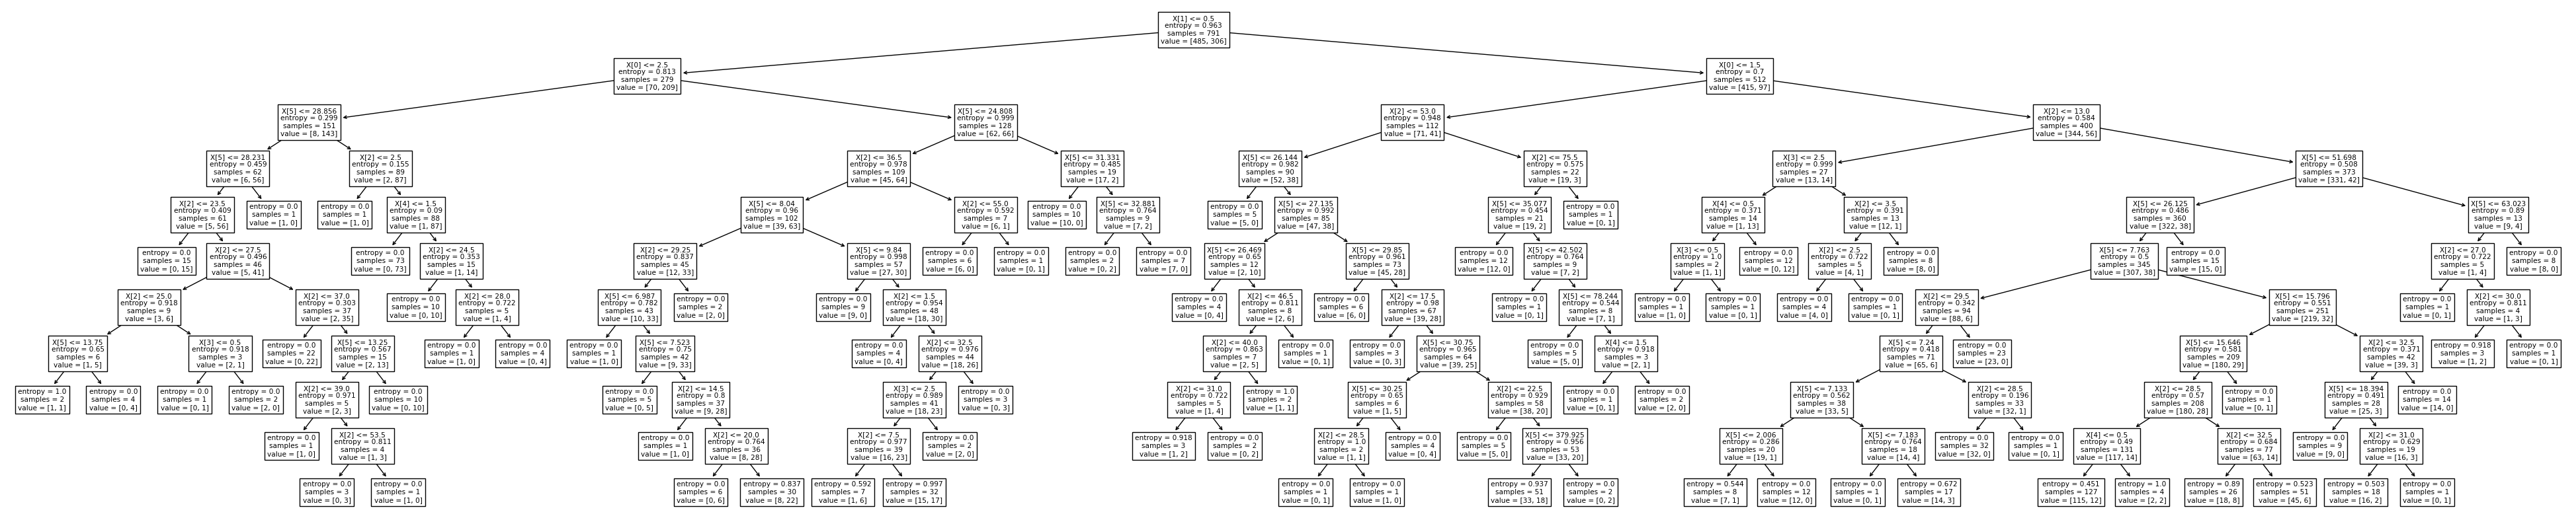

In [99]:
figure, ax = plt.subplots(figsize = (50, 10))
d_tree.plot_tree(tree)
plt.show()
figure.savefig('tree.jpeg')

# Random Forrest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
random_forrest = RandomForestClassifier(50, criterion='entropy', max_depth=11)

In [139]:
random_forrest.fit(data_train[train_list], data_train['Survived'])

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=50)

In [140]:
print('Training score:', random_forrest.score(data_train[train_list], data_train['Survived']))

Training score: 0.9405815423514539


In [141]:
print('Testing Score:', random_forrest.score(data_test[train_list], data_test['Survived']))

Testing Score: 0.85


In [143]:
temp_scores_test = []
temp_scores_train = []

for i in range(1, 101):
    random_forrest = RandomForestClassifier(i, criterion='entropy', max_depth=11)
    random_forrest.fit(data_train[train_list], data_train['Survived'])
    temp = random_forrest.score(data_train[train_list], data_train['Survived'])
    temp_scores_train.append(temp)
    temp = random_forrest.score(data_test[train_list], data_test['Survived'])
    temp_scores_test.append(temp)

In [144]:
print(temp_scores_test, temp_scores_train)

[0.78, 0.74, 0.84, 0.83, 0.83, 0.86, 0.8, 0.83, 0.85, 0.86, 0.81, 0.85, 0.88, 0.83, 0.84, 0.85, 0.83, 0.86, 0.86, 0.84, 0.82, 0.83, 0.84, 0.81, 0.81, 0.84, 0.82, 0.84, 0.84, 0.86, 0.86, 0.83, 0.84, 0.82, 0.85, 0.83, 0.84, 0.85, 0.87, 0.84, 0.85, 0.83, 0.83, 0.83, 0.84, 0.83, 0.83, 0.85, 0.85, 0.82, 0.86, 0.83, 0.82, 0.84, 0.84, 0.84, 0.83, 0.84, 0.86, 0.84, 0.84, 0.83, 0.84, 0.82, 0.82, 0.83, 0.84, 0.84, 0.84, 0.83, 0.83, 0.84, 0.85, 0.83, 0.85, 0.84, 0.85, 0.83, 0.83, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.83, 0.84, 0.83, 0.84, 0.83, 0.84, 0.82, 0.85, 0.84, 0.83, 0.84, 0.83, 0.83, 0.83] [0.8634639696586599, 0.8786346396965866, 0.9102402022756005, 0.9089759797724399, 0.9292035398230089, 0.9266750948166877, 0.9216182048040455, 0.9241466498103666, 0.922882427307206, 0.9279393173198482, 0.934260429835651, 0.9216182048040455, 0.9304677623261695, 0.9329962073324906, 0.9266750948166877, 0.93173198482933, 0.9380530973451328, 0.9418457648546145, 0.934260429835651, 0.9292035398230089, 0.94

In [145]:
print('TEST', np.argmax(temp_scores_test))
print('TRAIN', np.argmax(temp_scores_train))

TEST 12
TRAIN 26


In [150]:
temp_scores_test[12], temp_scores_train[26]

(0.88, 0.9481668773704172)

In [155]:
arr = [1,2,3,4,5,6,7,8,9,8,7,4,5,6,1,0,2,3]
print(np.argmax(arr))
arr[np.argmax(arr)], arr[8]

8


(9, 9)